# India House Price Prediction

In this project we are looking at the Indian Housing Prices Dataset. The dataset contains 25k rows and 23 columns, offering detailed insights into housing market trends across various Indian states. It includes attributes related to property types, pricing, location, and amenities. We will be looking at basic statiscal analysis fro example average property prices across states, most expensive cities, etc, and apply some machine learning algorithms like Linear Regression, Decision Trees and Random Forrest to predict house prices.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Import data set:

data set downloaded from https://www.kaggle.com/datasets/ankushpanday1/india-house-price-prediction

In [2]:
data_india_housing = pd.read_csv("E:\\ML Projects\\India House Price Prediction\\india_housing_prices.csv")

Preview of the data set

In [4]:
pd.set_option('display.max_columns', None)
data_india_housing.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [5]:
# Print column names:

for feature in data_india_housing.columns.tolist():
    print(feature)

ID
State
City
Locality
Property_Type
BHK
Size_in_SqFt
Price_in_Lakhs
Price_per_SqFt
Year_Built
Furnished_Status
Floor_No
Total_Floors
Age_of_Property
Nearby_Schools
Nearby_Hospitals
Public_Transport_Accessibility
Parking_Space
Security
Amenities
Facing
Owner_Type
Availability_Status


India has 28 states and 8 union terretories. However our data has less number of states.

In [6]:
print('Number of unique states in the data set:', len(data_india_housing['State'].unique()), '\n')
for st in data_india_housing['State'].unique():
    print(st)

Number of unique states in the data set: 20 

Tamil Nadu
Maharashtra
Punjab
Rajasthan
West Bengal
Chhattisgarh
Delhi
Jharkhand
Telangana
Karnataka
Uttar Pradesh
Assam
Uttarakhand
Bihar
Gujarat
Haryana
Andhra Pradesh
Madhya Pradesh
Kerala
Odisha


## Pre-processing

In [7]:
# Get info on the data set

data_india_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [8]:
# Check for missing values

print(data_india_housing.isnull().sum())

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64


## Average property prices across states

In [9]:
average_price_states = data_india_housing.groupby(['State'])['Price_in_Lakhs'].mean().sort_values()
average_price_states = pd.DataFrame(average_price_states).reset_index()
average_price_states

,State,Price_in_Lakhs
0,Delhi,252.529900
1,Chhattisgarh,252.676337
2,Assam,252.779235
3,Punjab,252.796877
4,Odisha,252.838743
5,Jharkhand,253.610145
6,West Bengal,254.008640
7,Kerala,254.367332
8,Haryana,254.445784
9,Rajasthan,254.600214


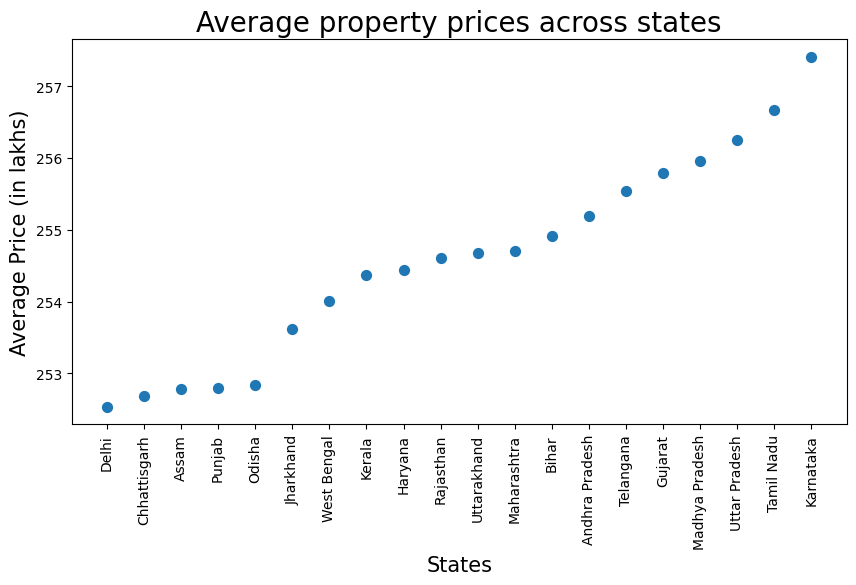

In [10]:
average_price_states.plot(x='State', y='Price_in_Lakhs', kind = 'scatter', figsize = (10,5), s = 50)
plt.title('Average property prices across states', fontsize = 20)
plt.xlabel('States', fontsize = 15)
plt.xticks(fontsize = 10, rotation=90)
plt.ylabel('Average Price (in lakhs)', fontsize = 15)
plt.show()

The average price tends to be higher on Southern states, while lower on Northern areas.

## Affordable Housing

In [11]:
affordable_housing_state = data_india_housing.groupby(['State'])['Price_per_SqFt'].mean().sort_values()
affordable_housing_state.head(5)

State
Punjab       0.129311
Rajasthan    0.129336
Delhi        0.129477
Jharkhand    0.129754
Kerala       0.129849
Name: Price_per_SqFt, dtype: float64

## Property Type Analysis

In [12]:
# Type of properties across the states:
property_type = list(data_india_housing['Property_Type'].unique())
property_type

['Apartment', 'Independent House', 'Villa']

In [13]:
property_count = data_india_housing['Property_Type'].value_counts()
property_count = pd.DataFrame(property_count).reset_index()
property_count

,Property_Type,count
0,Villa,83744
1,Independent House,83300
2,Apartment,82956


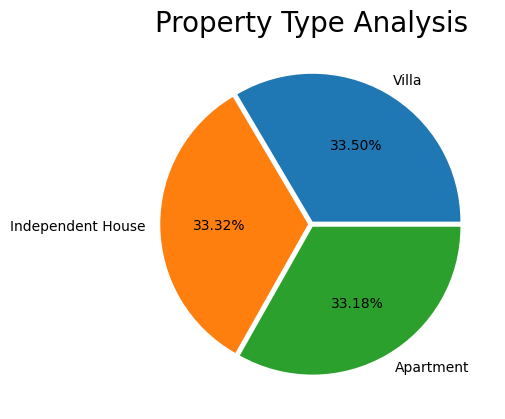

In [14]:
plt.pie(property_count['count'], labels = property_count['Property_Type'], autopct='%1.2f%%', explode = (0.02, 0.02, 0.02))
plt.title('Property Type Analysis', fontsize = 20)
plt.show()

## Average Property Size and Price per Square-Feet by Property Type

In [15]:
average_property_size = data_india_housing.groupby(['Property_Type'])[['Price_in_Lakhs', 'Size_in_SqFt', 'Price_per_SqFt']].mean()
average_property_size = pd.DataFrame(average_property_size).reset_index()
average_property_size

,Property_Type,Price_in_Lakhs,Size_in_SqFt,Price_per_SqFt
0,Apartment,254.622116,2751.174333,0.130493
1,Independent House,255.374150,2742.612017,0.131023
2,Villa,253.768802,2755.627926,0.130276


In [ ]:
# So on average, Independent Houses are a bit expensive than Apartments, which is a bit expensive than Villas.

## Most expensive cities

In [16]:
average_price_cities = data_india_housing.groupby(['City'])['Price_in_Lakhs'].mean().sort_values(ascending = False)
average_price_cities.head(5)

City
Bangalore    258.456639
Surat        258.080467
Kochi        257.415221
Gaya         257.053391
Mangalore    256.920925
Name: Price_in_Lakhs, dtype: float64

## Least expensive cities

In [17]:
average_price_cities.tail(5)

City
Mumbai        252.056633
Bilaspur      251.879267
New Delhi     251.614296
Trivandrum    251.258801
Cuttack       250.786672
Name: Price_in_Lakhs, dtype: float64

## Predict property prices

We will first look at ML algorithm  using Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
data_india_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [20]:
data_india_housing.iloc[0]

ID                                                                       1
State                                                           Tamil Nadu
City                                                               Chennai
Locality                                                       Locality_84
Property_Type                                                    Apartment
BHK                                                                      1
Size_in_SqFt                                                          4740
Price_in_Lakhs                                                      489.76
Price_per_SqFt                                                         0.1
Year_Built                                                            1990
Furnished_Status                                                 Furnished
Floor_No                                                                22
Total_Floors                                                             1
Age_of_Property          

In [21]:
print(f'Property Type: {data_india_housing['Property_Type'].unique()}')
print(f'Furnished Status: {data_india_housing['Furnished_Status'].unique()}')
print(f'Public Transport Accessibility: {data_india_housing['Public_Transport_Accessibility'].unique()}')
print(f'Parking Space: {data_india_housing['Parking_Space'].unique()}')
print(f'Security: {data_india_housing['Security'].unique()}')
print(f'Facing: {data_india_housing['Facing'].unique()}')

Property Type: ['Apartment' 'Independent House' 'Villa']
Furnished Status: ['Furnished' 'Unfurnished' 'Semi-furnished']
Public Transport Accessibility: ['High' 'Low' 'Medium']
Parking Space: ['No' 'Yes']
Security: ['No' 'Yes']
Facing: ['West' 'North' 'South' 'East']


So we see that columns like "Parking_Space" and "Security" are binary (use Binary encoding)

Columns "Furnished Stautus" and "Public_Transport_Accessibility" are ordinal, meaning they have a certain order to the values. I will use the OrdinalEncoder.

While "Property_Type" and "Facing" nominal, meaning there is no order. I will use a One-Hot encoder

In [22]:
data_preprocess = data_india_housing.copy()

In [23]:
# Binary encoding for the Parking_Space and Security

data_preprocess['Parking_Space'] = data_preprocess['Parking_Space'].map({'Yes' : 1, 'No' : 0})
data_preprocess['Security'] = data_preprocess['Security'].map({'Yes' : 1, 'No' : 0})

In [24]:
# Ordinal encoding for the Furnished_Status

from sklearn.preprocessing import OrdinalEncoder
enc_fs = OrdinalEncoder(categories = [['Unfurnished', 'Semi-furnished', 'Furnished']], dtype = int)
enc_fs.fit(data_preprocess[['Furnished_Status']])
data_preprocess['Furnished_Status'] = enc_fs.transform(data_preprocess[['Furnished_Status']])

In [25]:
# Ordinal encoding for the Public_Transport_Accessibility

enc_pta = OrdinalEncoder(categories = [['Low', 'Medium', 'High']], dtype = int)
enc_pta.fit(data_preprocess[['Public_Transport_Accessibility']])
data_preprocess['Public_Transport_Accessibility'] = enc_pta.transform(data_preprocess[['Public_Transport_Accessibility']])

In [26]:
# OneHot encoding for the "Facing" and "Property_Type"

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(dtype = int)
ohe_features = ['Facing', 'Property_Type']
encoded_data = ohe.fit_transform(data_preprocess[ohe_features]).todense()

In [27]:
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(ohe_features))

In [28]:
data_preprocess = data_preprocess.drop(columns = ohe_features).reset_index()
data_preprocess = pd.concat([data_preprocess, encoded_df], axis = 1)

In [29]:
data_preprocess.iloc[0]

index                                                                     0
ID                                                                        1
State                                                            Tamil Nadu
City                                                                Chennai
Locality                                                        Locality_84
BHK                                                                       1
Size_in_SqFt                                                           4740
Price_in_Lakhs                                                       489.76
Price_per_SqFt                                                          0.1
Year_Built                                                             1990
Furnished_Status                                                          2
Floor_No                                                                 22
Total_Floors                                                              1
Age_of_Prope

In [30]:
# For the Amenities, let's look at the unique values

data_preprocess['Amenities'].unique()

array(['Playground, Gym, Garden, Pool, Clubhouse',
       'Playground, Clubhouse, Pool, Gym, Garden',
       'Clubhouse, Pool, Playground, Gym',
       'Playground, Clubhouse, Gym, Pool, Garden',
       'Playground, Garden, Gym, Pool, Clubhouse',
       'Playground, Clubhouse', 'Clubhouse, Garden, Playground',
       'Gym, Pool, Clubhouse, Playground',
       'Garden, Clubhouse, Playground',
       'Clubhouse, Playground, Garden, Gym', 'Clubhouse',
       'Clubhouse, Gym, Playground, Pool',
       'Clubhouse, Garden, Gym, Playground, Pool',
       'Garden, Gym, Playground', 'Playground',
       'Pool, Playground, Garden, Gym', 'Pool, Clubhouse, Gym',
       'Garden, Clubhouse, Pool, Gym, Playground',
       'Pool, Playground, Clubhouse',
       'Clubhouse, Gym, Garden, Pool, Playground',
       'Pool, Clubhouse, Gym, Playground, Garden',
       'Garden, Pool, Gym, Playground, Clubhouse', 'Pool, Gym, Clubhouse',
       'Clubhouse, Garden', 'Pool, Garden, Playground, Gym',
       'Garden

The idea is to 'explode' the amenities into columns

reference: https://ransakaravihara.medium.com/efficient-data-preprocessing-with-sklearns-multilabelbinarizer-467df389e750

In [31]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
# ---------------------------------------------------
start_time = datetime.datetime.now()
new_df = pd.DataFrame(mlb.fit_transform(data_preprocess['Amenities'].str.split(', ')),
                        columns = [f'Amenities_{col}' for col in mlb.classes_],
                        index = data_preprocess.index)
data_preprocess = pd.concat([data_preprocess, new_df], axis = 1)
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
# ---------------------------------------------------
print(f"Elapsed time: {elapsed_time.total_seconds()} seconds")

Elapsed time: 0.513844 seconds


In [32]:
data_preprocess.iloc[2]

index                                                             2
ID                                                                3
State                                                        Punjab
City                                                       Ludhiana
Locality                                               Locality_167
BHK                                                               2
Size_in_SqFt                                                   3642
Price_in_Lakhs                                               183.79
Price_per_SqFt                                                 0.05
Year_Built                                                     1997
Furnished_Status                                                  1
Floor_No                                                         19
Total_Floors                                                     27
Age_of_Property                                                  28
Nearby_Schools                                  

Some important features that might contribute to house pricing:

Property_Type, BHK, Size_in_SqFt, Price_per_SqFt, Year_Built,<br>
Furnished_Status, Floor_No, Total_Floors, Age_of_Property, Nearby_Schools,<br>
Nearby_Hospitals, Public_Transport_Accessibility, Parking_Space, Security,<br>
Amenities, Facing, Owner_Type, Availability_Status

In [33]:
data_preprocess.columns

Index(['index', 'ID', 'State', 'City', 'Locality', 'BHK', 'Size_in_SqFt',
       'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status',
       'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools',
       'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space',
       'Security', 'Amenities', 'Owner_Type', 'Availability_Status',
       'Facing_East', 'Facing_North', 'Facing_South', 'Facing_West',
       'Property_Type_Apartment', 'Property_Type_Independent House',
       'Property_Type_Villa', 'Amenities_Clubhouse', 'Amenities_Garden',
       'Amenities_Gym', 'Amenities_Playground', 'Amenities_Pool'],
      dtype='object')

In [34]:
# Define X and y variables
X = data_preprocess[['BHK', 'Size_in_SqFt',
       'Price_per_SqFt', 'Year_Built', 'Furnished_Status',
       'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools',
       'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space',
       'Security', 'Facing_East', 'Facing_North', 'Facing_South', 'Facing_West',
       'Property_Type_Apartment', 'Property_Type_Independent House',
       'Property_Type_Villa', 'Amenities_Clubhouse', 'Amenities_Garden',
       'Amenities_Gym', 'Amenities_Playground', 'Amenities_Pool']]

y = data_preprocess['Price_in_Lakhs']

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (250000, 25)
Shape of y: (250000,)


#### Run a Linear Regression Model to predict Price of House

In [52]:
# Run Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [37]:
# Build linear regression model
lr = LinearRegression()

In [38]:
# Fit the training data
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict response based on test data set
y_pred_lr = lr.predict(X_test)

In [41]:
# Mean Squared Error for the Linear Regression model

mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error for the Linear Regression Model: {mse_lr}')

Mean Squared Error for the Linear Regression Model: 9997.934743860178


In [42]:
# R-squared value

r2_lr = r2_score(y_test, y_pred_lr)
print(f"R-squared (R²): {r2_lr}")

R-squared (R²): 0.497019901441454


#### Run a Decision Tree Regression Model

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [47]:
# Create Decision Tree regression object
clf = DecisionTreeRegressor()

In [48]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [49]:
#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)

In [54]:
# Mean Squared Error for the Decision Tree Regression model

mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Mean Squared Error for the Decision Tree Regression Model: {mse_dt}')

Mean Squared Error for the Decision Tree Regression Model: 152.58480055200002


In [55]:
# R-squared value

r2_dt = r2_score(y_test, y_pred_dt)
print(f"R-squared (R²): {r2_dt}")

R-squared (R²): 0.992323702845999


#### Run a Random Forest Regression Model

In [60]:
# Let's use RandomForest regression model

from sklearn.ensemble import RandomForestRegressor

# Create RandomForest Regressor 
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
# Predict the response for the test data set

y_pred_rf = rf.predict(X_test)

In [62]:
# Mean Squared Error for the RandomForest Regression model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error for the RandomForest Regression Model: {mse_rf}')

# R-squared value
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-squared (R²): {r2_rf}")

Mean Squared Error for the RandomForest Regression Model: 78.54018351111058
R-squared (R²): 0.9960487690452786


#### Clean Up the models - Don't really have to run if you ran the models above

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define X and y variables
X = data_preprocess[['BHK', 'Size_in_SqFt',
       'Price_per_SqFt', 'Year_Built', 'Furnished_Status',
       'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools',
       'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space',
       'Security', 'Facing_East', 'Facing_North', 'Facing_South', 'Facing_West',
       'Property_Type_Apartment', 'Property_Type_Independent House',
       'Property_Type_Villa', 'Amenities_Clubhouse', 'Amenities_Garden',
       'Amenities_Gym', 'Amenities_Playground', 'Amenities_Pool']]

y = data_preprocess['Price_in_Lakhs']

# Print the shape of X and y
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# List the models
models = [LinearRegression(),
         DecisionTreeRegressor(),
         RandomForestRegressor(n_estimators=100, random_state=42)
         ]

# Metrics list
mae_list = []
mse_list = []
r2_list = []
time_list = []

for model in models:
    start_time = datetime.datetime.now()

    # Train the model
    model.fit(X_train, y_train)

    # Model prediction on a test data set
    y_pred = model.predict(X_test)

    # Define metrics to calculate model accuracy
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    end_time = datetime.datetime.now()
    elapsed_time = end_time - start_time

    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)
    time_list.append(elapsed_time)

summ = pd.DataFrame(list(zip(mae_list, mse_list, r2_list, time_list)), 
                    index = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'],
                    columns = ['mean_absolute_error', 'mean_squared_error', 'r_squared', 'elapsed_time']
                   )
print(summ)

Shape of X: (250000, 25)
Shape of y: (250000,)
                       mean_absolute_error  mean_squared_error  r_squared  \
LinearRegression                 80.422904         9997.934744   0.497020   
DecisionTreeRegressor             9.121644          152.643178   0.992321   
RandomForestRegressor             6.876288           78.540184   0.996049   

                                elapsed_time  
LinearRegression      0 days 00:00:00.166332  
DecisionTreeRegressor 0 days 00:00:01.937810  
RandomForestRegressor 0 days 00:03:12.424782  


In [71]:
summ

,mean_absolute_error,mean_squared_error,r_squared,elapsed_time
LinearRegression,80.422904,9997.934744,0.497020,0 days 00:00:00.166332
DecisionTreeRegressor,9.121644,152.643178,0.992321,0 days 00:00:01.937810
RandomForestRegressor,6.876288,78.540184,0.996049,0 days 00:03:12.424782
